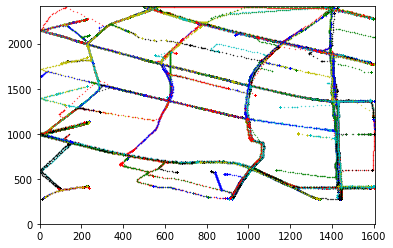

In [6]:
import pandas as pd
import matplotlib.pyplot as plot

csv_file = "CSV/trajectories_20161116_0800_0805.csv"

df = pd.read_csv(csv_file, names=['vehicle_id', 'time', 'longitude', 'latitude'], header=0)
x_max = df['longitude'].max()
y_max = df['latitude'].max()
plot.xlim(0, x_max)
plot.ylim(0, y_max)

chunk_size = 10000

chunk_num = 1
for chunk in pd.read_csv(csv_file, error_bad_lines=False, chunksize=chunk_size):
    colors = ['r', 'g', 'c', 'b', 'y', 'k']
    trace_id = chunk['vehicle_id'].drop_duplicates()
    for id in trace_id:
        trace = chunk[
            (chunk['vehicle_id'] == id)]
        if len(trace):
            x = trace['longitude']
            y = trace['latitude']
            plot.scatter(x, y, 0.1, colors[int(id % 6)])

plot.show()